# Supervised methods

In [1]:
import pandas as pd

df = pd.read_csv('temp/Delivery_truck_trip_data_autoencoder_df.csv')

In [2]:
df.reset_index(drop=True, inplace=True)
X = df.drop(['anomaly'], axis=1)
y = df['anomaly']

# split X y to train and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

### Create a Table of performance

In [3]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

table_of_performance = pd.DataFrame(columns=['algorithm', 'confusion matrix', 'accuracy', 'precision', 'recall'])

def add_performance(algorithm, y_test, y_predict):
    global table_of_performance
    
    cm = confusion_matrix(y_test, y_predict)
    accuracy = accuracy_score(y_test, y_predict)
    precision = precision_score(y_test, y_predict)
    recall = recall_score(y_test, y_predict)
    new_row = {'algorithm': algorithm, 'confusion matrix': cm, 'accuracy': accuracy, 'precision': precision, 'recall': recall}

    table_of_performance.loc[len(table_of_performance)] = new_row

### XGBoost

In [4]:
from xgboost import XGBClassifier
XGB = XGBClassifier()
XGB.fit(X_train, y_train)
y_predict = XGB.predict(X_test)

add_performance('XGBoost', y_test, y_predict)

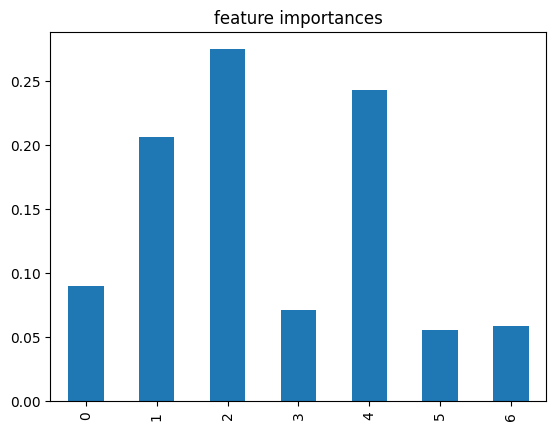

In [5]:
import matplotlib.pyplot as plt

feature_importances = pd.Series(XGB.feature_importances_, index = X.columns)

feature_importances_plot = feature_importances.plot(kind='bar', title='feature importances')
fig = feature_importances_plot.get_figure()
plt.show()

### Logistic Regression

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

LR = LogisticRegression()
LR.fit(X_train, y_train)
y_predict = LR.predict(X_test)

add_performance('logistic regression', y_test, y_predict)

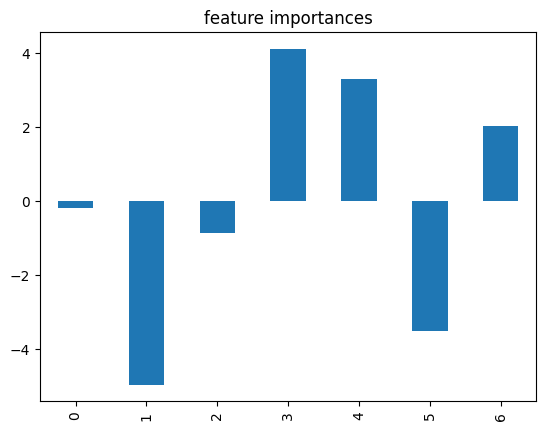

In [7]:
feature_importances = pd.Series(LR.coef_[0], index = X.columns)

feature_importances_plot = feature_importances.plot(kind='bar', title='feature importances')
fig = feature_importances_plot.get_figure()
plt.show()

### Random Forest

In [8]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier()
RF.fit(X_train, y_train)
y_predict = RF.predict(X_test)

add_performance('random forest', y_test, y_predict)

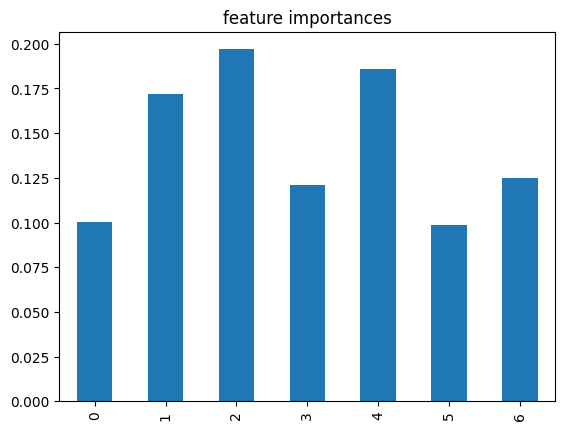

In [9]:
feature_importances = pd.Series(RF.feature_importances_, index = X.columns)

feature_importances_plot = feature_importances.plot(kind='bar', title='feature importances')
fig = feature_importances_plot.get_figure()
plt.show()

### Gradient-boosted trees

In [10]:
from sklearn.ensemble import GradientBoostingClassifier

GBC = GradientBoostingClassifier()
GBC.fit(X_train, y_train)
y_predict = GBC.predict(X_test)

add_performance('gradient-boosted trees', y_test, y_predict)

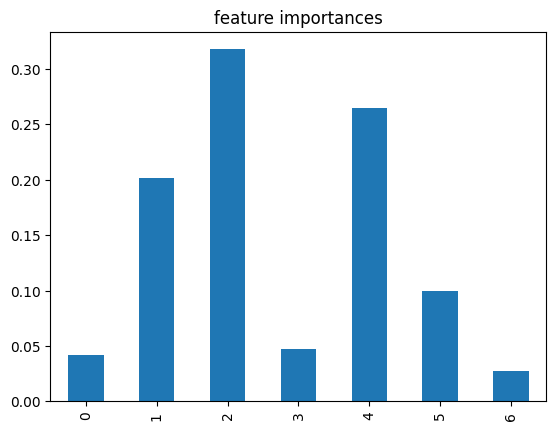

In [11]:
feature_importances = pd.Series(GBC.feature_importances_, index = X.columns)

feature_importances_plot = feature_importances.plot(kind='bar', title='feature importances')
fig = feature_importances_plot.get_figure()
plt.show()

### Decision Trees

In [12]:
from sklearn.tree import DecisionTreeClassifier

DTC = DecisionTreeClassifier()
DTC.fit(X_train, y_train)
y_predict = DTC.predict(X_test)

add_performance('decision trees', y_test, y_predict)

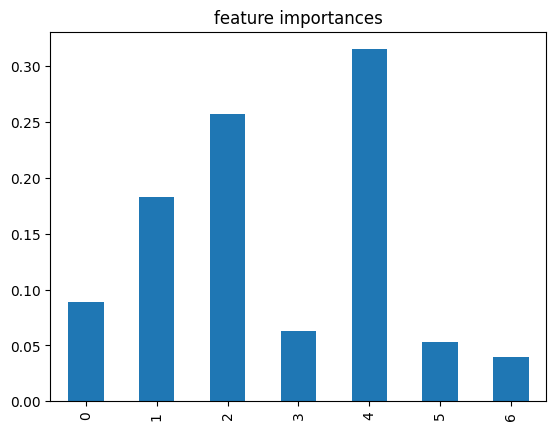

In [13]:
feature_importances = pd.Series(DTC.feature_importances_, index = X.columns)

feature_importances_plot = feature_importances.plot(kind='bar', title='feature importances')
fig = feature_importances_plot.get_figure()
plt.show()

### Naive Bayes

In [14]:
from sklearn.naive_bayes import GaussianNB

GNB = GaussianNB()
GNB.fit(X_train, y_train)
y_predict = GNB.predict(X_test)

add_performance('naive bayes', y_test, y_predict)

### Support Vector Machines

In [15]:
from sklearn.svm import SVC

SV = SVC()
SV.fit(X_train, y_train)
y_predict = SV.predict(X_test)

add_performance('support vector machine', y_test, y_predict)

### Performance

In [16]:
table_of_performance.to_csv('temp/Delivery_truck_trip_data_autoencoder_supervised_performance.csv', index=False)